# K Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [45]:
data= make_blobs(n_samples=300,n_features=2,centers=4,cluster_std=1.5)

In [46]:
features= pd.DataFrame(data[0],columns=['f1','f2'])
target= pd.DataFrame(data[1],columns=['target'])
df= pd.concat([features,target],axis=1)

In [47]:
df.head()

,f1,f2,target
0,-3.889917,6.472379,3
1,-5.697625,-9.694270,2
2,-4.945638,6.292621,3
3,1.180785,0.731172,0
4,0.040167,-2.733886,1


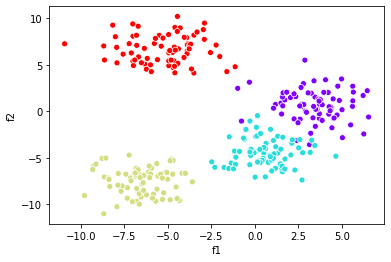

In [53]:
sns.scatterplot(x='f1',y='f2',hue='target',data=df,palette='rainbow',legend=False)

In [54]:
from sklearn.cluster import KMeans

In [110]:
kmc= KMeans(n_clusters=2)

In [111]:
kmc.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [112]:
kmc.cluster_centers_

array([[-0.98643464,  3.76579307],
       [-2.79455128, -6.0429759 ]])

In [113]:
labels= kmc.labels_

In [114]:
kmeans= pd.concat([features,pd.Series(labels,name='clusters')],axis=1)

In [115]:

kmeans.head()

,f1,f2,clusters
0,-3.889917,6.472379,0
1,-5.697625,-9.694270,1
2,-4.945638,6.292621,0
3,1.180785,0.731172,0
4,0.040167,-2.733886,1


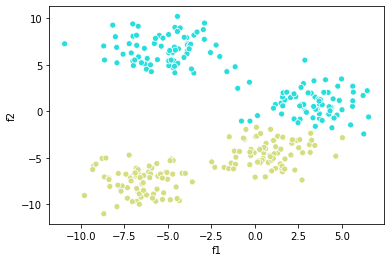

In [116]:
sns.scatterplot(x='f1',y='f2',hue='clusters',data=kmeans,palette='rainbow',legend=False)


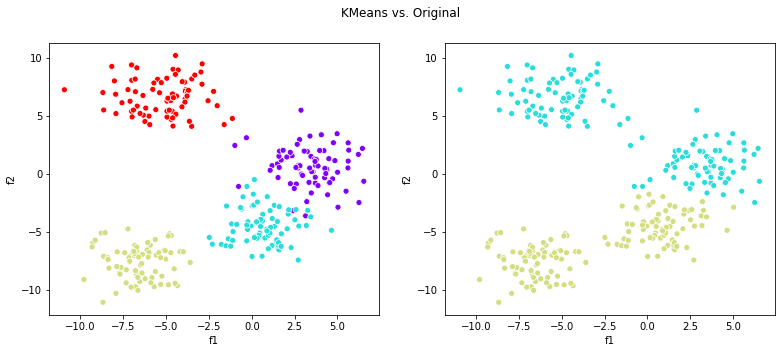

In [117]:
fig, ax = plt.subplots(1, 2,figsize=(13, 5))
fig.suptitle('KMeans vs. Original')
sns.scatterplot(x='f1',y='f2',hue='target',data=df,palette='rainbow',legend=False,ax=ax[0])
sns.scatterplot(x='f1',y='f2',hue='clusters',data=kmeans,palette='rainbow',legend=False,ax=ax[1])


In [ ]:
kmc.inertia_

In [124]:
wcss=[]
for i in range(1,16):
    kmc= KMeans(n_clusters=i)
    kmc.fit(features)
    wcss.append(kmc.inertia_)

Text(0, 0.5, 'Within cluster sum of squares')

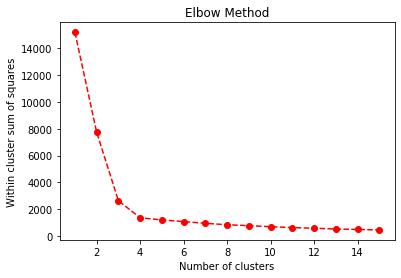

In [131]:
plt.plot(list(range(1,16)),wcss,'--ro')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')